## Data Preview

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
# A random sample of data
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
247,ham,Kallis wont bat in 2nd innings.,NaN,NaN,NaN
4281,ham,U can call now...,NaN,NaN,NaN
1292,ham,Da my birthdate in certificate is in april but...,NaN,NaN,NaN
4519,ham,What to think no one saying clearly. Ok leave ...,NaN,NaN,NaN
2603,ham,\Im at arestaurant eating squid! i will be out...,NaN,NaN,NaN


## 1. Exploratory Data Analysis (EDA)


In [4]:
# Total number of rows and columns
df.shape

(5572, 5)

In [5]:
# Summary of the dataframe
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [6]:
#inplace=True is used to permanantly save the changes in table to the original table
df.rename(columns={'v1':'target', 'v2': 'spam_text'}, inplace=True)
df.head()

,target,spam_text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
# Checking for number of ham and spams and plotting it using a pie chart
df['target'].value_counts()

target
ham     4825
spam     747
Name: count, dtype: int64

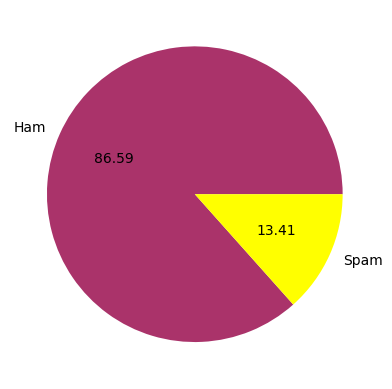

In [8]:
colors = ["#AA336A", "#FFFF00"]
plt.pie(df['target'].value_counts(), labels=['Ham', 'Spam'], autopct="%0.2f", colors=colors)
plt.show()


Out of the total of 5572 rows, in column "target", we have 4825 values as ham and the others as spam.

Which means 86.59% values are not spam. Data is skewed towards non spam (ham) values

In [9]:
pd.set_option('display.max_colwidth', None)
df["spam_text"].head(100)

0                                                                               Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
1                                                                                                                                                                 Ok lar... Joking wif u oni...
2                                   Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3                                                                                                                                             U dun say so early hor... U c already then say...
4                                                                                                                                 Nah I don't think he goes to usf, he lives around here though
                                        

Looking at the text it also seems like NLTK stop words may not be enough. We can additionally add our own stop words like: "u", "ok", etc.

In [10]:
# Check for null values
df.isnull().sum()

target           0
spam_text        0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

Out of 5572 rows:
- v1 and v2 have no null rows
- "Unnamed: 2", "Unnamed: 3" and "Unnamed: 4" columns have mostly null values

Since most values of columns "Unnamed: 2", "Unnamed: 3" and "Unnamed: 4" null, so we will delete them

In [11]:
import nltk

# Adding additional columns 
df['num_characters'] = df['spam_text'].apply(len)
df['num_words'] = df['spam_text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentences'] = df['spam_text'].apply(lambda x: len(nltk.sent_tokenize(x)))
cols = ["target", "num_characters", "num_words", "num_sentences", "spam_text"]
df[cols].head()

,target,num_characters,num_words,num_sentences,spam_text
0,ham,111,24,2,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,29,8,2,Ok lar... Joking wif u oni...
2,spam,155,37,2,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,49,13,1,U dun say so early hor... U c already then say...
4,ham,61,15,1,"Nah I don't think he goes to usf, he lives around here though"


In [12]:
df[["num_characters", "num_words", "num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,5572.000000,5572.000000,5572.000000
mean,80.118808,18.699390,1.996411
std,59.690841,13.741932,1.520159
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.500000
75%,121.000000,27.000000,2.000000
max,910.000000,220.000000,38.000000


<Axes: >

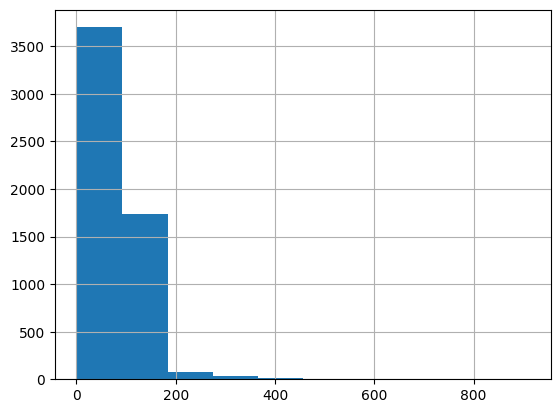

In [13]:
# Number of characters present in each SMS
df['num_characters'].hist()

Text messages have a range of from 2 to 910 characters and generally, it is around 80 characters on an average.

<Axes: >

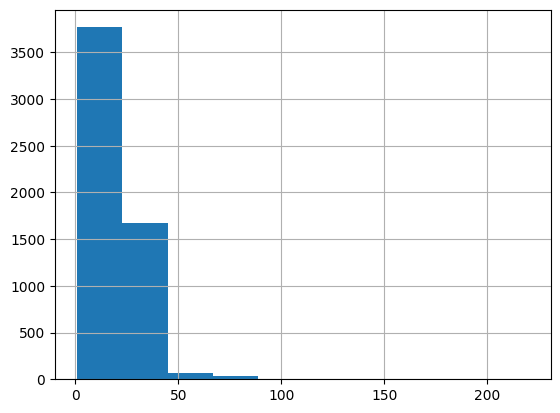

In [14]:
# Number of words present in each SMS
df['num_words'].hist()

Text messages have 1 to 220 words and generally, a message contain ~19 words on an average.

    

<Axes: >

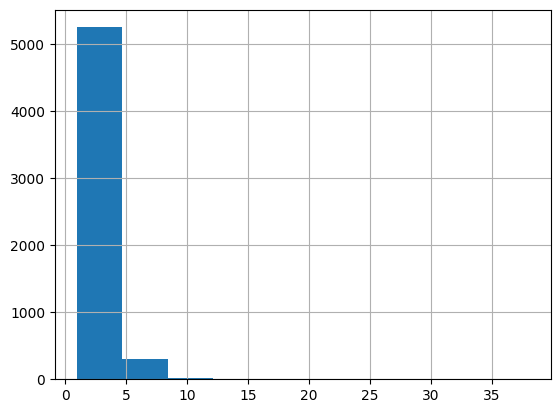

In [15]:
# Number of sentences
df['num_sentences'].hist()

Text messages have a range of 1 to 38 sentences and generally, a message contain ~2 sentences on an average.

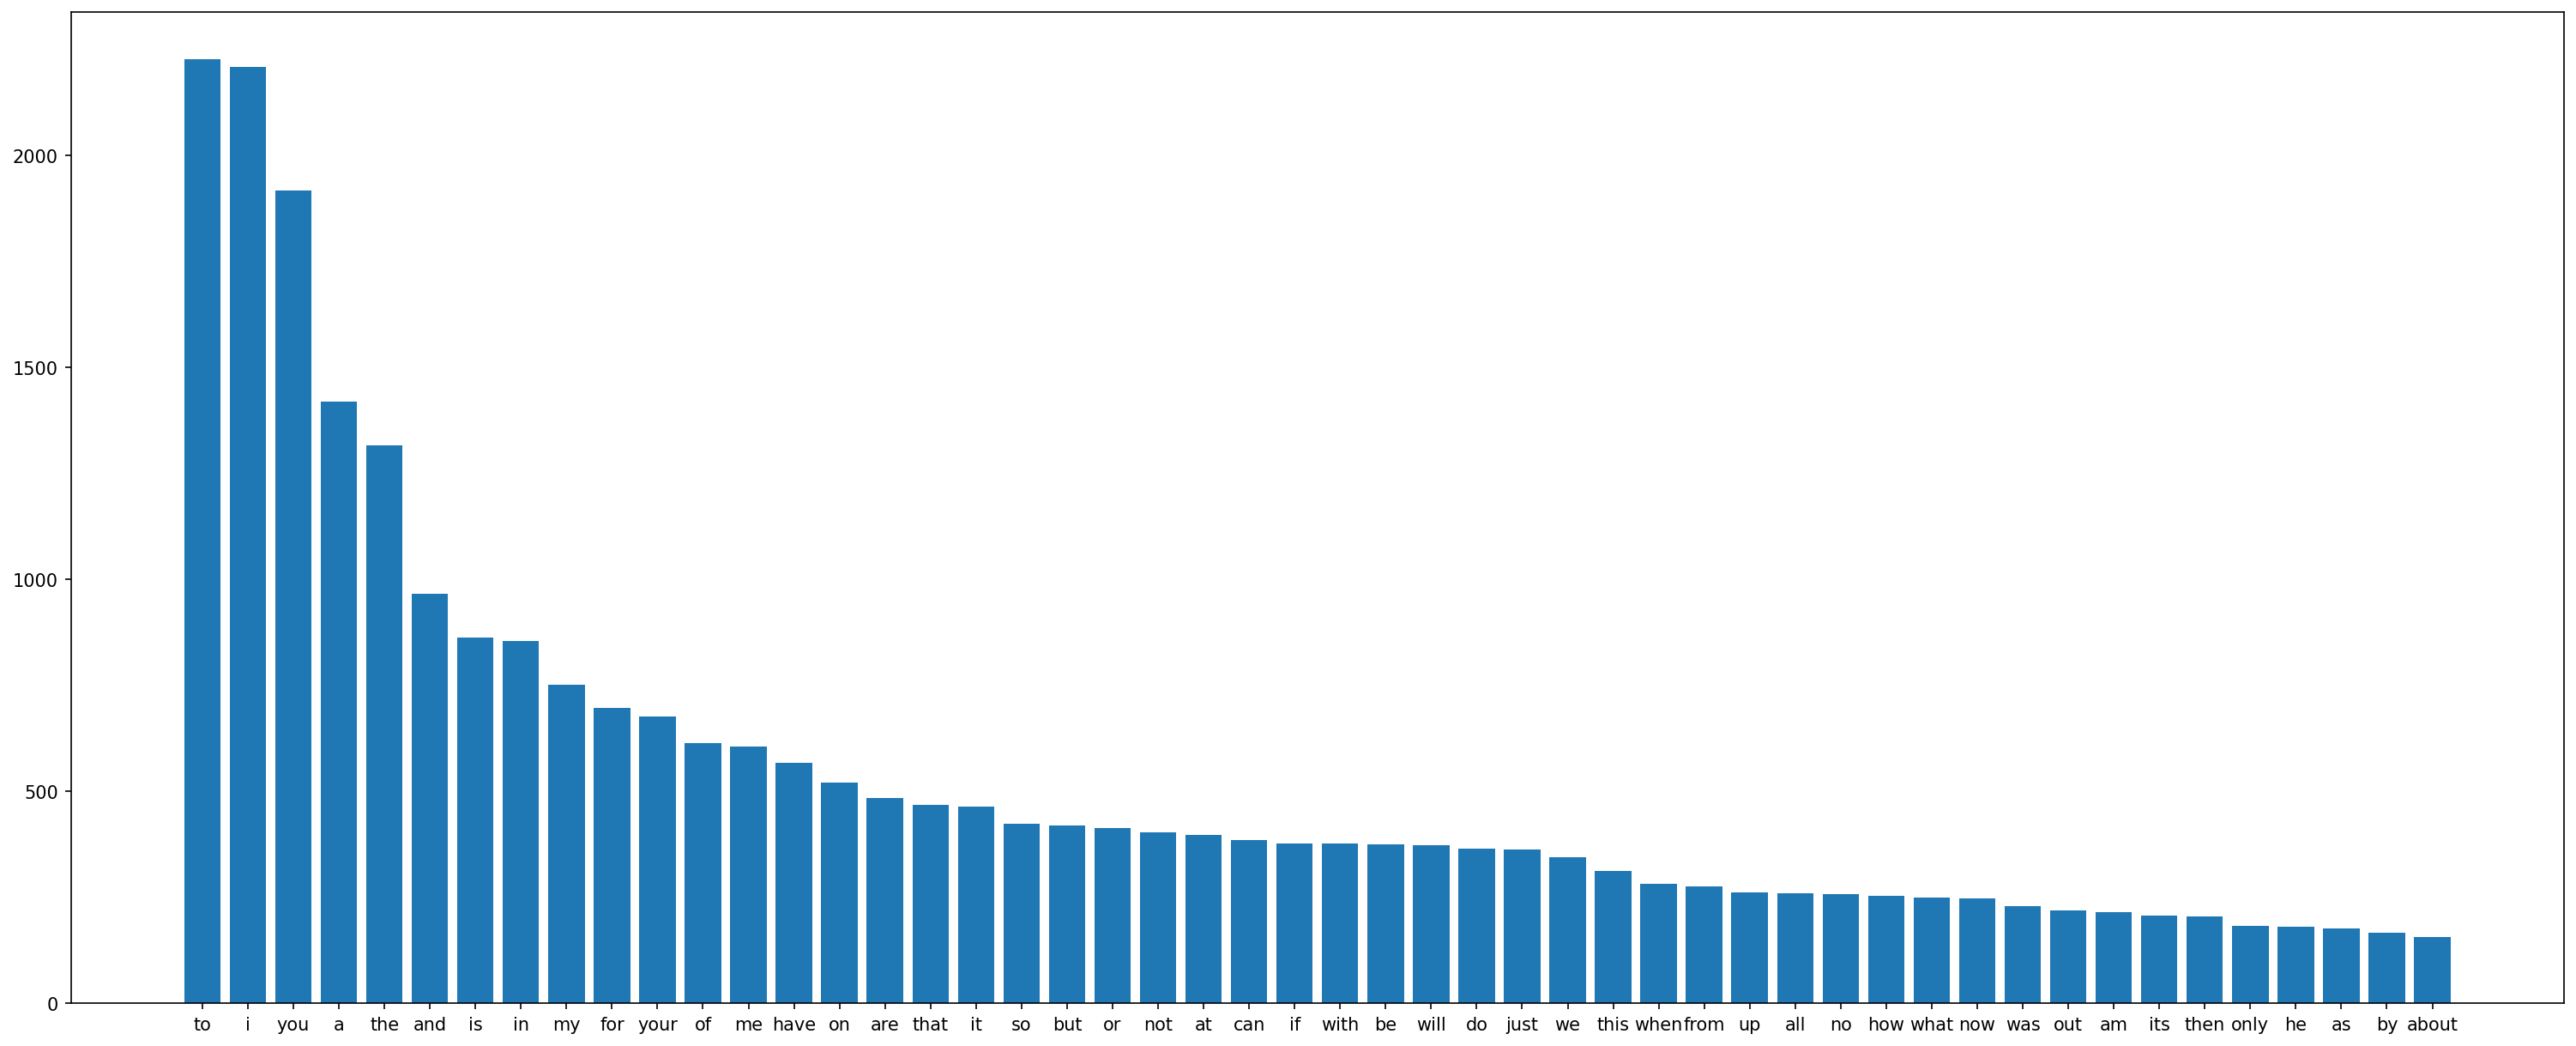

In [16]:
# Plot top stop words
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from nltk.corpus import stopwords
from collections import defaultdict

figure(figsize=(25, 10), dpi=150)

def plot_top_stopwords_barchart(text, num_stop_words):
    stop = set(stopwords.words('english'))
    
    new = text.str.split()
    new = new.values.tolist()
    corpus = [word.lower() for i in new for word in i]
    
    dic = defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word] += 1
            
    top = sorted(dic.items(), key=lambda x:x[1],reverse=True)[:num_stop_words] 
    x, y = zip(*top)
    bars = plt.bar(x,y)
    return bars, x

bars, x = plot_top_stopwords_barchart(df['spam_text'], 50)

In [17]:
print(x)

('to', 'i', 'you', 'a', 'the', 'and', 'is', 'in', 'my', 'for', 'your', 'of', 'me', 'have', 'on', 'are', 'that', 'it', 'so', 'but', 'or', 'not', 'at', 'can', 'if', 'with', 'be', 'will', 'do', 'just', 'we', 'this', 'when', 'from', 'up', 'all', 'no', 'how', 'what', 'now', 'was', 'out', 'am', 'its', 'then', 'only', 'he', 'as', 'by', 'about')


In [18]:
df[df['target']=="spam"][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,747.000000,747.000000,747.000000
mean,138.866131,27.891566,3.021419
std,29.183082,6.867007,1.537580
min,13.000000,2.000000,1.000000
25%,132.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [19]:
df[df['target']=="ham"][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.276269,1.837720
std,58.016023,13.988585,1.454388
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


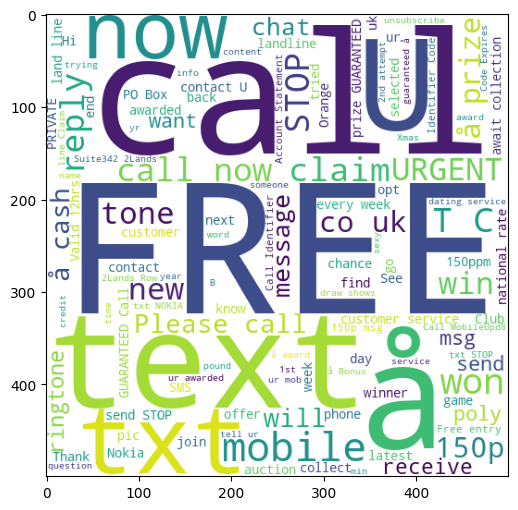

In [20]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['target'] == "spam"]['spam_text'].str.cat(sep=" "))

plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

Common words seem to be text, free, call, now, mobile, reply, urgent, etc.

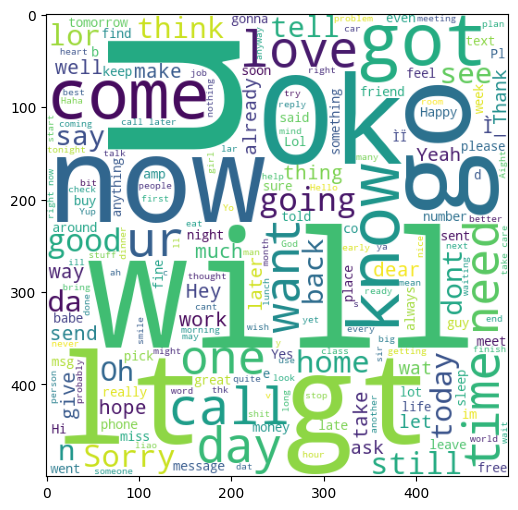

In [21]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['target'] == "ham"]['spam_text'].str.cat(sep=" "))

plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

Common words seem to be u, ok, now, will, dear, going, home, etc.

In [23]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.figure(figsize=(9, 6))
# sns.histplot(df[df['target']==0]['num_characters'])
# sns.histplot(df[df['target']==1]['num_characters'], color='red')
# sns.plt.show()

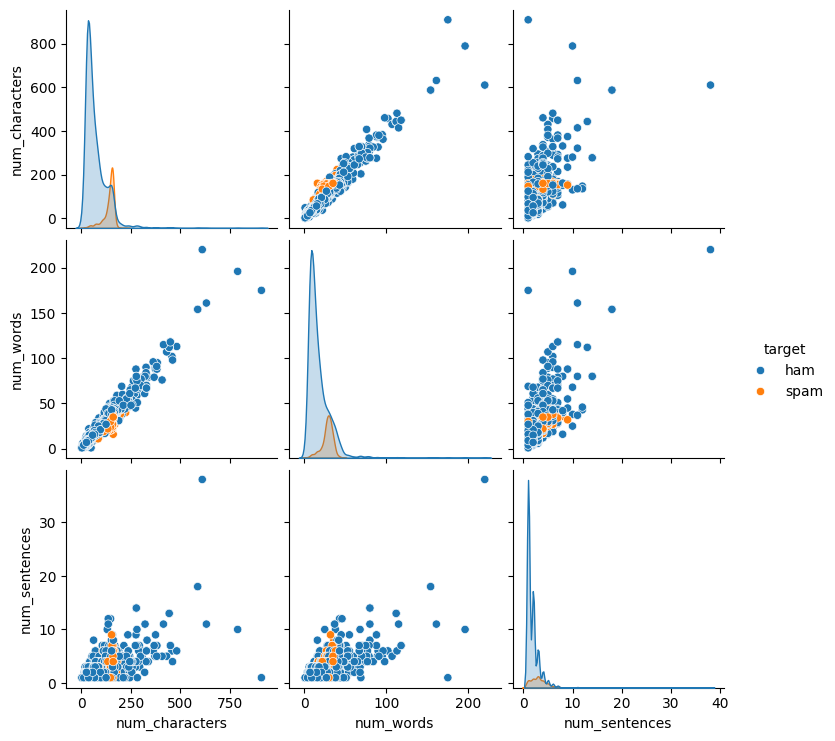

In [24]:
# sns.pairplot(df, hue='target')

## 2. Data cleaning

In [25]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
# column renames
df.head(5)

,target,spam_text,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives around here though",61,15,1


In [26]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
df.head(5)

,target,spam_text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives around here though",61,15,1


In [27]:
# Check for duplicates
df.duplicated().sum()

403

In [28]:
# Removing them
df = df.drop_duplicates(keep='first')
# Check for duplicates again
df.duplicated().sum()

0

In [29]:
df.shape

(5169, 5)

# 3. Data Preprocessing

Steps that we'll perform:
1. Identify additional stop words
2. Lower-case
3. Tokenization
4. Removal of special characters
5. Removal of stopwords/punctuation
6. Stemming

In [30]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/reet/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string

ps = PorterStemmer()
stop_words = stopwords.words('english')
punctuation = string.punctuation

In [ ]:
# Identify additional stop-words for Text Messages which are not already in stopwords.words('english')

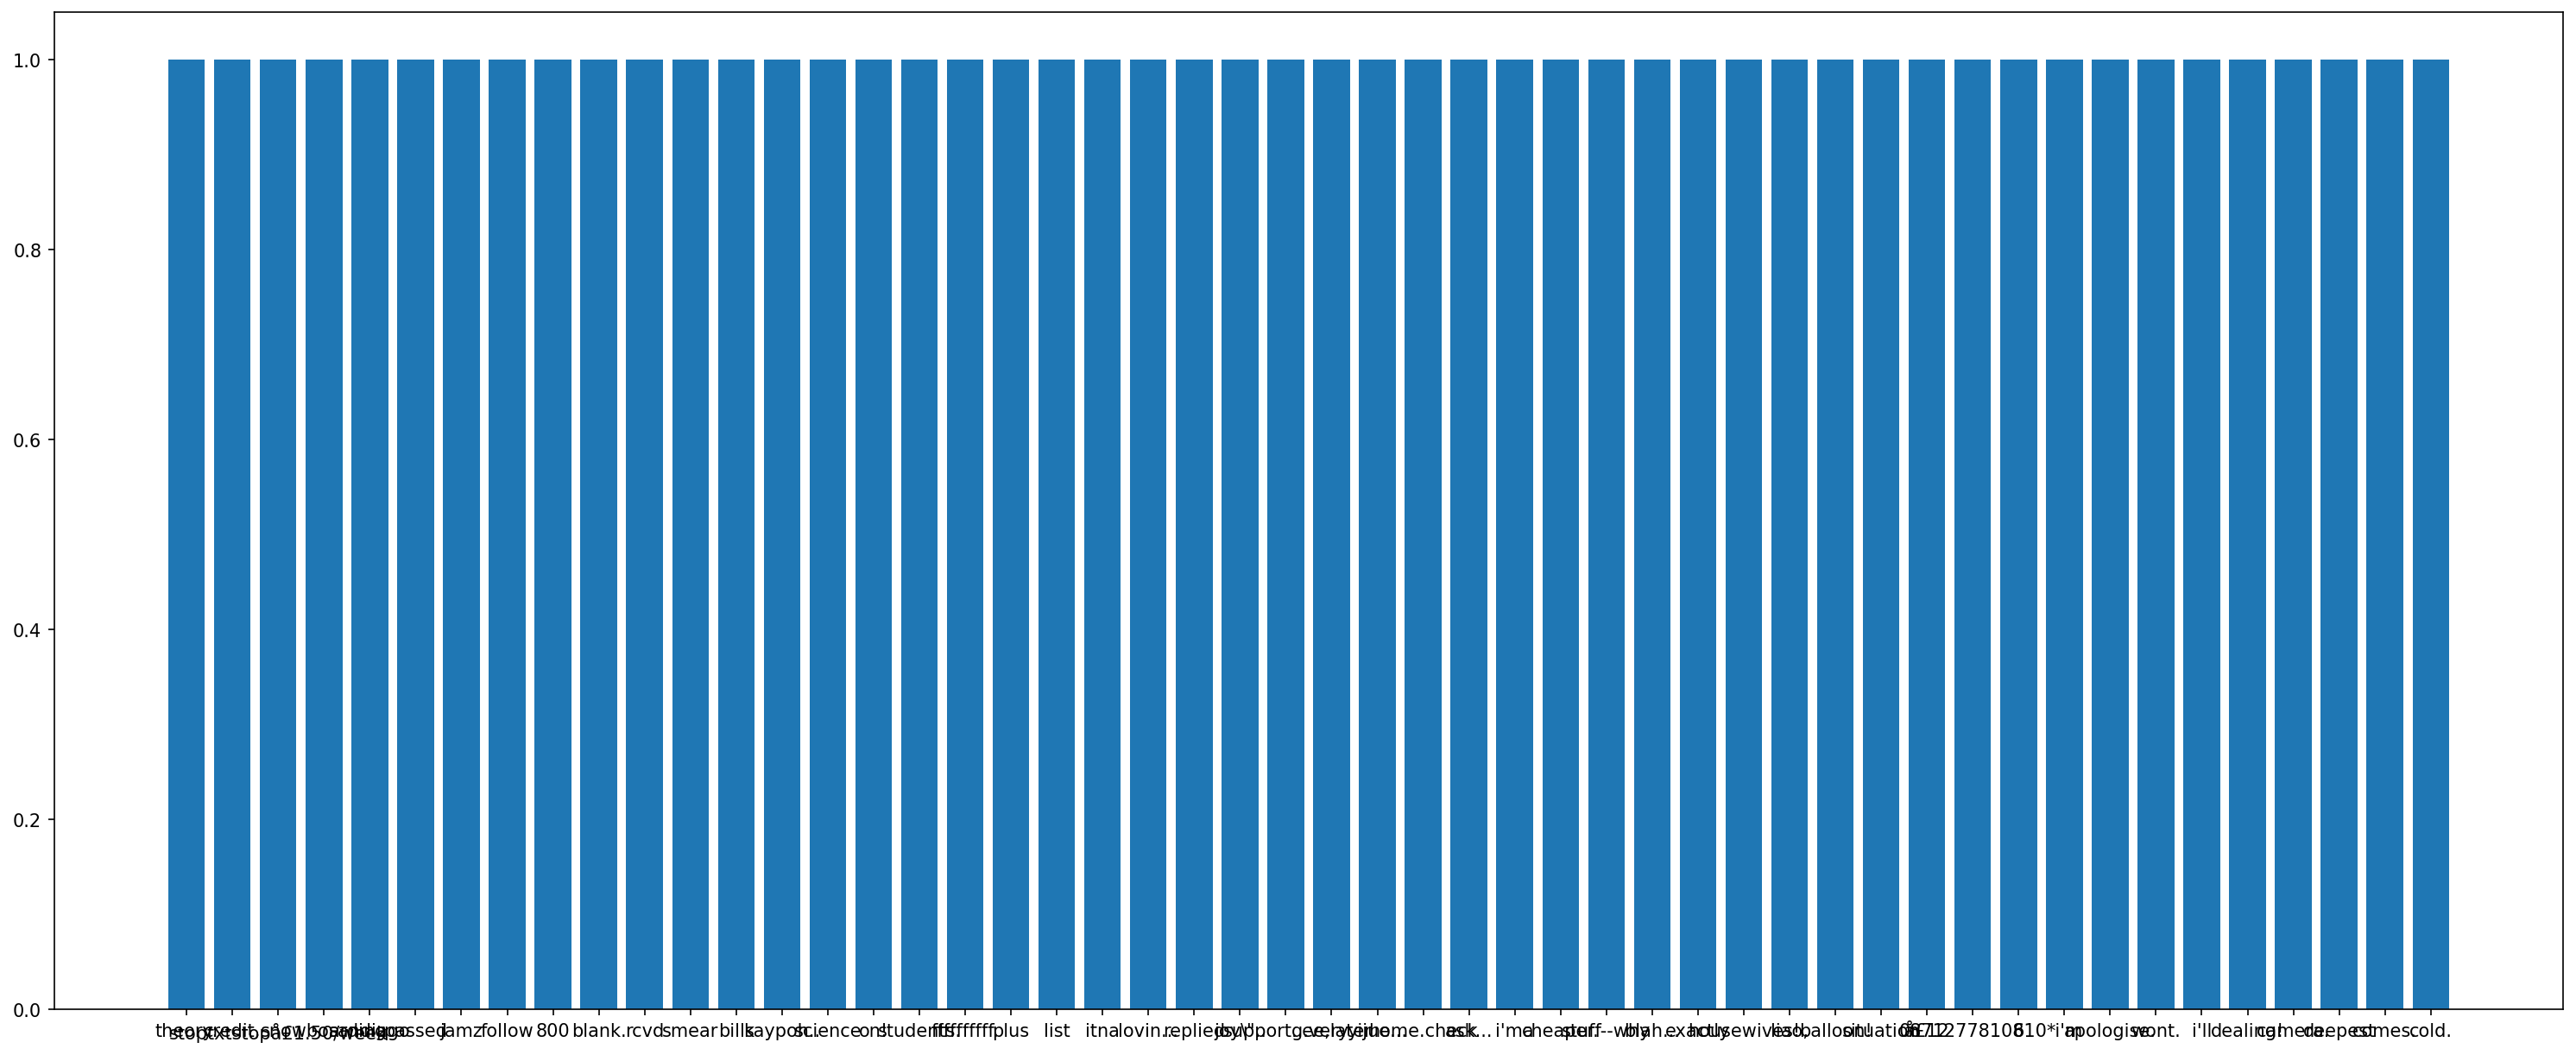

In [33]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from nltk.corpus import stopwords
from collections import defaultdict

figure(figsize=(25, 10), dpi=150)

from nltk.corpus import stopwords
from collections import defaultdict

def plot_top_words_barchart(input_column, num_stop_words):
    cols = input_column.str.split()
    list_of_rows = cols.values.tolist()
    
    # Get unique words with set and lower of every word
    corpus = set([word.lower() for row in list_of_rows for word in row])
    
    dic = defaultdict(int)
    for word in corpus:
        if word not in stop_words and word not in punctuation:
            dic[word] += 1
            
    top = sorted(dic.items(), key=lambda x:x[1],reverse=True)[:num_stop_words] 
    x, y = zip(*top)
    bars = plt.bar(x,y)
    return bars, top

bars, top = plot_top_words_barchart(df['spam_text'], 50)

It seems like no additional stop words can be identified. Remaining words are all at the frequency of 1.

In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []

    # Check if alphanumeric
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stop_words and i not in punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [ ]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

In [ ]:
df['transformed_text'] = df['spam_text'].apply(transform_text)

In [ ]:
df.head()

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [ ]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [ ]:
from collections import Counter
df2 = pd.DataFrame(Counter(spam_corpus).most_common(30))
a = df2[0]
b = df2[1]
sns.barplot(x=a, y=b, color='pink')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [ ]:
df3 = pd.DataFrame(Counter(ham_corpus).most_common(30))
c = df3[0]
d = df3[1]
sns.barplot(x=c, y=d, color='pink')
plt.xticks(rotation='vertical')
plt.show()

# 4. MODEL BUILDING

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
import pickle

pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))